In [1]:
# # Setup access to my Google Drive
# from google.colab import drive
# drive.mount('/content/drive',  force_remount=False)

# # Set the working directory
# import os
# os.chdir('/content/drive/MyDrive/ViT_myWorks/')
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
# !pip install -q torchmetrics
# !pip install --upgrade pytorch-pretrained-vit
# !pip install efficientnet_pytorch

In [3]:
import torch
import pandas as pd
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
from resViT.model import *
from resViT.train import *
from resViT.loaddata import *
from sklearn.svm import SVC
import scipy.io as sio

In [4]:
root_path = './cwruData/' #running from local
tarData = ['FE_tar_7_1', 'FE_tar_7_2', 'FE_tar_7_3', 'FE_tar_14_1', 'FE_tar_14_2',
           'FE_tar_14_3', 'FE_tar_21_1', 'FE_tar_21_2', 'FE_tar_21_3', 'ims_tar'];
class_names = ['N', 'IR', 'B', 'OR']

Validation Accuracy =  99.0625
__________________________________________________
Pricision Score = 0.9912317620650954
__________________________________________________
F_1 Score =  0.9908754600664974
__________________________________________________
Recall Score =  0.9906635802469136
__________________________________________________
Response time per batch 0.7522456645965576
Validation Accuracy =  99.0625
__________________________________________________
Pricision Score = 0.9908536585365854
__________________________________________________
F_1 Score =  0.9909008958313579
__________________________________________________
Recall Score =  0.9912040930754136
__________________________________________________
Response time per batch 0.6675026416778564
Validation Accuracy =  99.0625
__________________________________________________
Pricision Score = 0.9900342712842713
__________________________________________________
F_1 Score =  0.9899701878543912
__________________________________

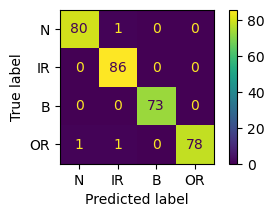

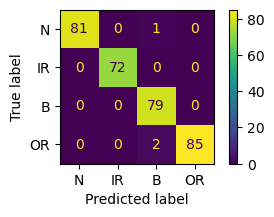

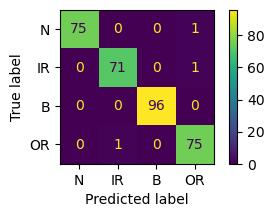

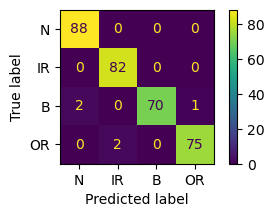

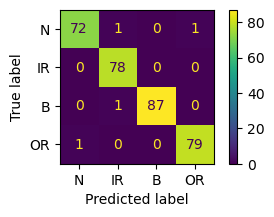

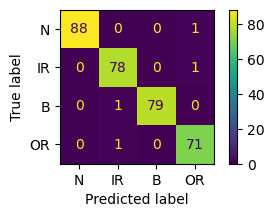

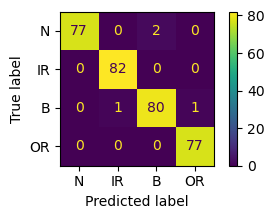

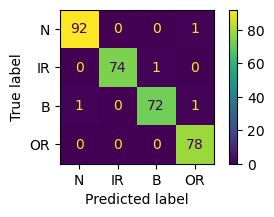

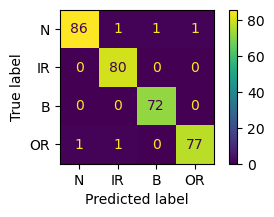

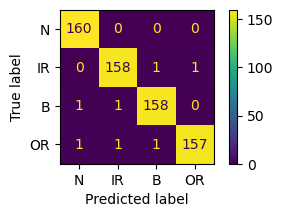

In [5]:
# Validate and Visualize
perfvit = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vit = {}
for name in tarData:
    Model = torch.load('./saved_models/ViT_'+ name + '_N.pth', map_location=device)
    _, TestLoader, _, numClass = loadNoisydata(root_path, name)
    val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate_pr(Model, TestLoader, numClass)
    print('Validation Accuracy = ', 100*val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch', time_batch)
    disp_conf_matrix(cm, class_names)
    logits_vit[f'pred_labels_{name}'] = tr_labels
    logits_vit[f'tr_labels_{name}'] = pred_labels
    perfvit = pd.concat((perfvit, pd.DataFrame({name : [100*val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/cwru_N_vit.mat', logits_vit)

# Train benchmark models for comparisions
## Models: EfficientNet, ResNeXt, DenseNet, VGGNet, GoogleNet, SqeezeNet

### PreTrained Standard ViT with 12 encoder blocks

Validation Accuracy =  95.9375
__________________________________________________
Pricision Score = 0.960227870058873
__________________________________________________
F_1 Score =  0.9568649134235325
__________________________________________________
Recall Score =  0.9561559276171148
__________________________________________________
Response time per batch
 0.4236605167388916
Validation Accuracy =  91.5625
__________________________________________________
Pricision Score = 0.9258536139503092
__________________________________________________
F_1 Score =  0.9163551983564097
__________________________________________________
Recall Score =  0.9152601229744293
__________________________________________________
Response time per batch
 0.5282235145568848
Validation Accuracy =  91.25
__________________________________________________
Pricision Score = 0.9110440719181399
__________________________________________________
F_1 Score =  0.9076366453039381
___________________________________

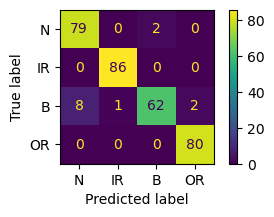

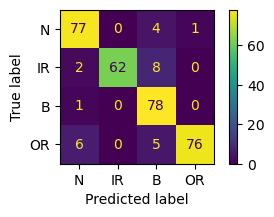

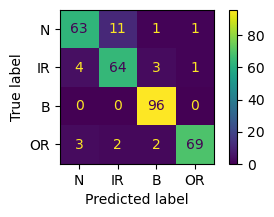

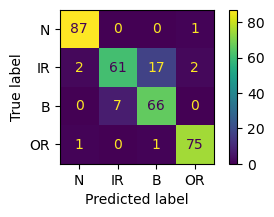

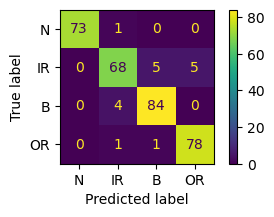

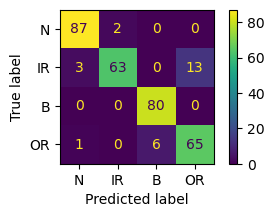

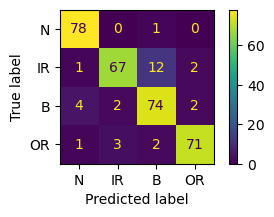

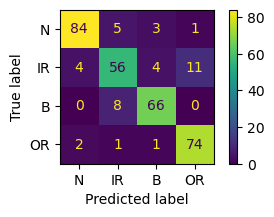

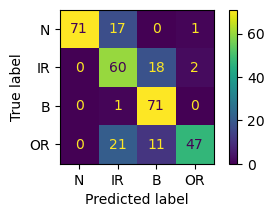

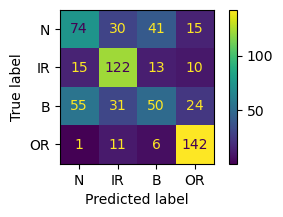

In [6]:
# Validate and Visualize
perfvit_pre = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vit_pre = {}
for name in tarData:
    Model = torch.load('./saved_models/ViT_pre_'+ name +'_N.pth', map_location=device)
    _, TestLoader, _, numClass = loadNoisydata(root_path, name)
    val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch\n', time_batch)
    disp_conf_matrix(cm, class_names)
    logits_vit_pre[f'pred_labels_{name}'] = tr_labels
    logits_vit_pre[f'tr_labels_{name}'] = pred_labels
    perfvit_pre = pd.concat((perfvit_pre, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
    # perfvit_pre.to_csv('perfvit_pre.csv')
sio.savemat('./results/logits/cwru_N_vit_pre.mat', logits_vit_pre)

In [7]:
# perfvit_pre = pd.read_csv('./results/perfvit_pre.csv')
# perfvit_pre = perfvit_pre.drop(('Unnamed: 0'), axis = 1)
# perfvit_pre.columns = pd.RangeIndex(start=0, stop=11, step=1)
# perfvit_pre

### EfficientNet

Validation Accuracy =  91.875
__________________________________________________
Pricision Score = 0.9196830119776177
__________________________________________________
F_1 Score =  0.9140569730825641
__________________________________________________
Recall Score =  0.9135490656181295
__________________________________________________
Response time per batch
 0.20323657989501953
Validation Accuracy =  90.625
__________________________________________________
Pricision Score = 0.9066162496040545
__________________________________________________
F_1 Score =  0.9054222907899967
__________________________________________________
Recall Score =  0.9071201348744172
__________________________________________________
Response time per batch
 0.1887047290802002
Validation Accuracy =  92.1875
__________________________________________________
Pricision Score = 0.9222777963886615
__________________________________________________
F_1 Score =  0.917315293474772
__________________________________

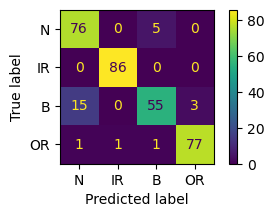

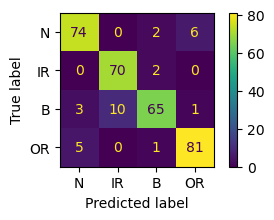

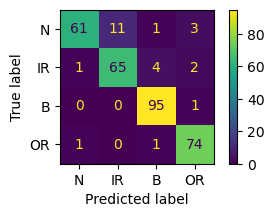

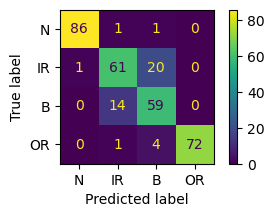

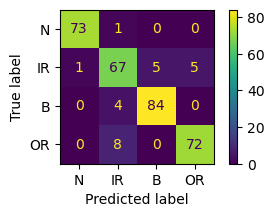

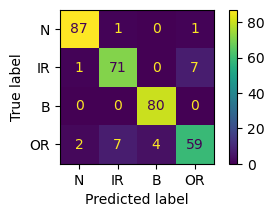

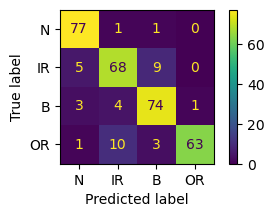

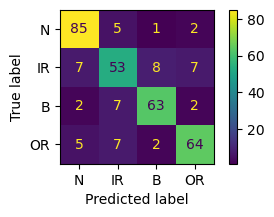

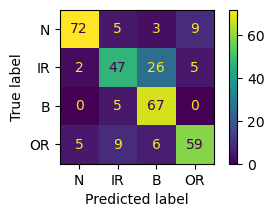

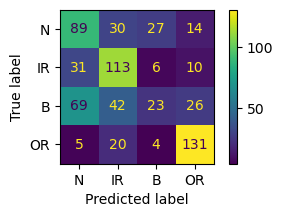

In [8]:
# Validate and Visualize
perfEffNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_EffNet = {}
for name in tarData:
    Model = torch.load('./saved_models/efficient_'+ name +'_N.pth', map_location=device)
    _, TestLoader, _, numClass = loadNoisydata(root_path, name)
    val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch\n', time_batch)
    disp_conf_matrix(cm, class_names)
    logits_EffNet[f'pred_labels_{name}'] = tr_labels
    logits_EffNet[f'tr_labels_{name}'] = pred_labels
    perfEffNet = pd.concat((perfEffNet, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/cwru_N_EffNet.mat', logits_EffNet)

### ResNeXt

Validation Accuracy =  92.5
__________________________________________________
Pricision Score = 0.9269400352733685
__________________________________________________
F_1 Score =  0.9232334363655037
__________________________________________________
Recall Score =  0.9244778822971852
__________________________________________________
Response time per batch 0.20428156852722168
Validation Accuracy =  92.8125
__________________________________________________
Pricision Score = 0.928507807151218
__________________________________________________
F_1 Score =  0.9289604714718257
__________________________________________________
Recall Score =  0.9299864690866464
__________________________________________________
Response time per batch 0.19580721855163574
Validation Accuracy =  96.5625
__________________________________________________
Pricision Score = 0.9638680874768204
__________________________________________________
F_1 Score =  0.9638512549491312
____________________________________

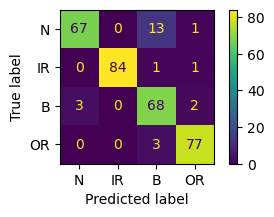

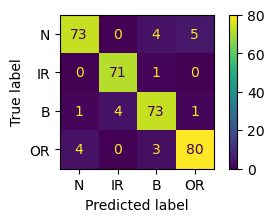

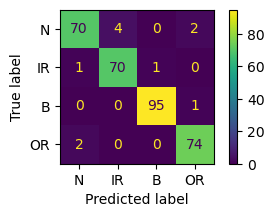

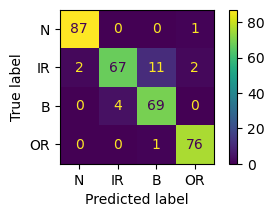

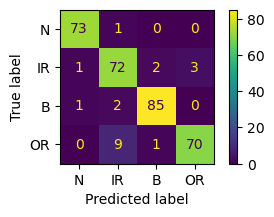

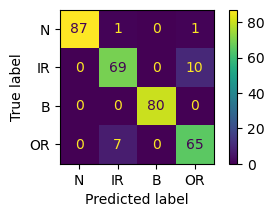

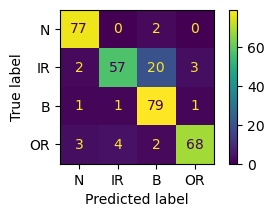

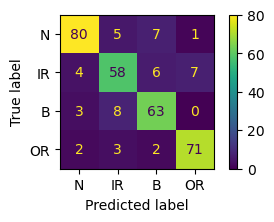

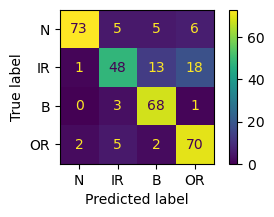

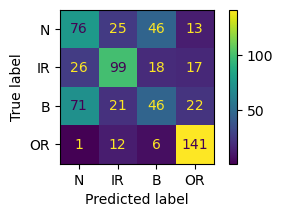

In [9]:
# Validate and Visualize
perfResNeXt = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_ResNext = {}
for name in tarData:
    _, TestLoader, _, numClass = loadNoisydata(root_path, name)
    Model = torch.load('./saved_models/ResNeXt_'+ name +'_N.pth', map_location=device)
    val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch', time_batch)
    disp_conf_matrix(cm, class_names)
    logits_ResNext[f'pred_labels_{name}'] = tr_labels
    logits_ResNext[f'tr_labels_{name}'] = pred_labels
    perfResNeXt = pd.concat((perfResNeXt, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/cwru_N_ResNext.mat', logits_ResNext)

### DenseNet

Validation Accuracy =  95.0
__________________________________________________
Pricision Score = 0.9491007007256773
__________________________________________________
F_1 Score =  0.9480914359823533
__________________________________________________
Recall Score =  0.9478548694441494
__________________________________________________
Response time per batch 0.14105963706970215
Validation Accuracy =  94.375
__________________________________________________
Pricision Score = 0.9459592926259592
__________________________________________________
F_1 Score =  0.944467903440446
__________________________________________________
Recall Score =  0.9452898123208644
__________________________________________________
Response time per batch 0.17972159385681152
Validation Accuracy =  95.9375
__________________________________________________
Pricision Score = 0.9583091787439613
__________________________________________________
F_1 Score =  0.9573009693206699
_____________________________________

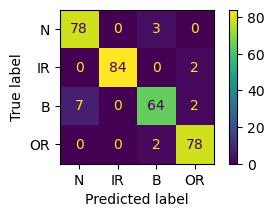

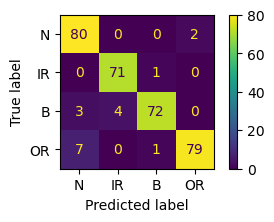

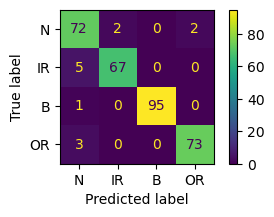

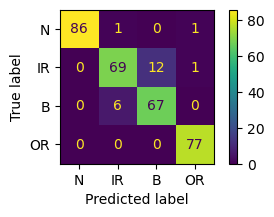

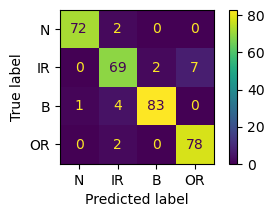

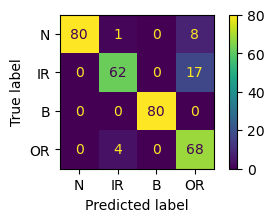

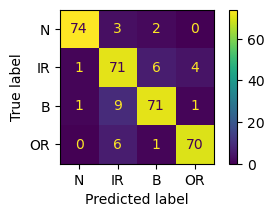

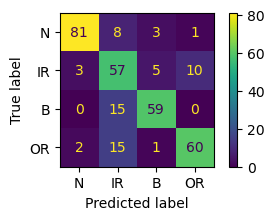

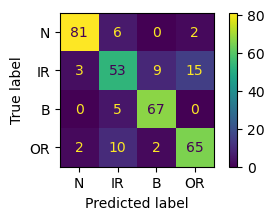

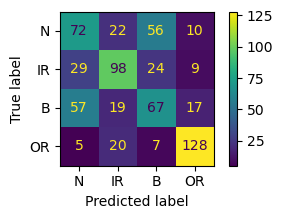

In [10]:
# Validate and Visualize
perfDenseNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_DenseNet = {}
for name in tarData:
        _, TestLoader, _, numClass = loadNoisydata(root_path, name)
        Model = torch.load('./saved_models/DenseNet_'+ name+'_N.pth', map_location=device)
        val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
        print('Validation Accuracy = ', val_acc)
        print("__________________________________________________")
        print(f'Pricision Score = {prec}')
        print('__________________________________________________')
        print(f'F_1 Score =  {f1}')
        print('__________________________________________________')
        print(f"Recall Score =  {recall}")
        print('__________________________________________________')
        print('Response time per batch', time_batch)
        disp_conf_matrix(cm, class_names)
        logits_DenseNet[f'pred_labels_{name}'] = tr_labels
        logits_DenseNet[f'tr_labels_{name}'] = pred_labels
        perfDenseNet = pd.concat((perfDenseNet, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/cwru_N_DenseNet.mat', logits_DenseNet)

### vgg16Net

Validation Accuracy =  95.0
__________________________________________________
Pricision Score = 0.9481390950094573
__________________________________________________
F_1 Score =  0.948041251047645
__________________________________________________
Recall Score =  0.9481338787417555
__________________________________________________
Response time per batch

 0.2756032943725586
Validation Accuracy =  94.6875
__________________________________________________
Pricision Score = 0.9475659953594755
__________________________________________________
F_1 Score =  0.9477746175033015
__________________________________________________
Recall Score =  0.948219711218282
__________________________________________________
Response time per batch

 0.2671024799346924
Validation Accuracy =  95.625
__________________________________________________
Pricision Score = 0.95497819066898
__________________________________________________
F_1 Score =  0.9546049723380152
______________________________________

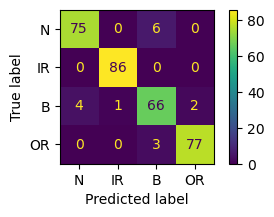

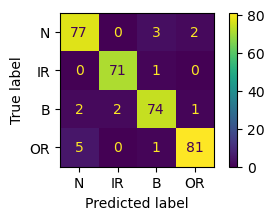

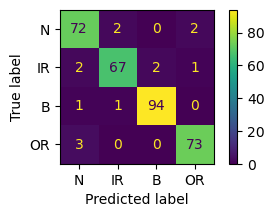

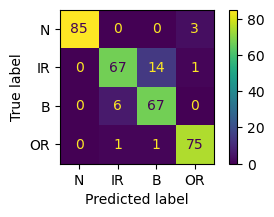

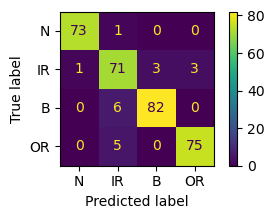

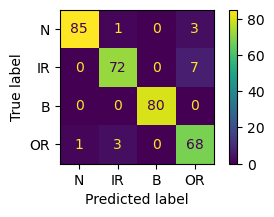

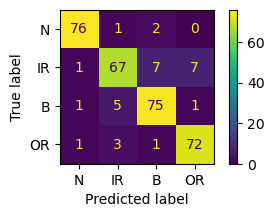

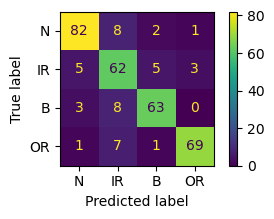

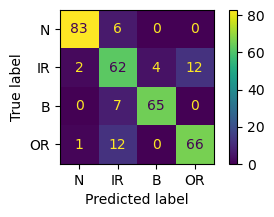

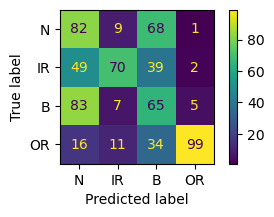

In [11]:
# Validate and Visualize

# Validate and Visualize
perfvgg16Net = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_vgg16Net = {}
for name in tarData:
    _, TestLoader, _, numClass = loadNoisydata(root_path, name)
    Model = torch.load('./saved_models/vgg16Net_'+ name +'_N.pth', map_location=device)
    val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch\n\n', time_batch)
    disp_conf_matrix(cm, class_names)
    logits_vgg16Net[f'pred_labels_{name}'] = tr_labels
    logits_vgg16Net[f'tr_labels_{name}'] = pred_labels
    perfvgg16Net = pd.concat((perfvgg16Net, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/cwru_N_vgg16Net.mat', logits_vgg16Net)

### GoogleNet

Validation Accuracy =  92.5
__________________________________________________
Pricision Score = 0.9220959595959597
__________________________________________________
F_1 Score =  0.9219832048261585
__________________________________________________
Recall Score =  0.9219738288516828
__________________________________________________
Response time per batch 0.10985255241394043
Validation Accuracy =  87.8125
__________________________________________________
Pricision Score = 0.883421903100618
__________________________________________________
F_1 Score =  0.8784573703888086
__________________________________________________
Recall Score =  0.8766836753101273
__________________________________________________
Response time per batch 0.10013604164123535
Validation Accuracy =  90.9375
__________________________________________________
Pricision Score = 0.9057464526214526
__________________________________________________
F_1 Score =  0.9035185376967687
____________________________________

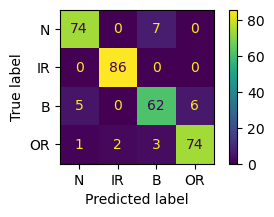

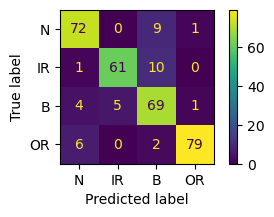

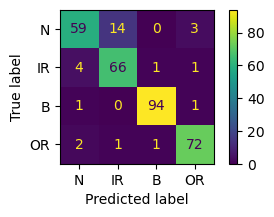

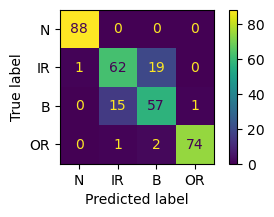

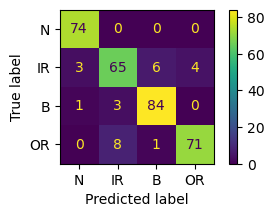

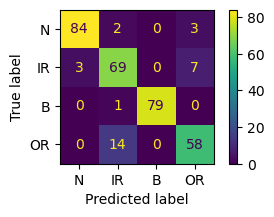

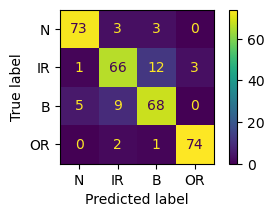

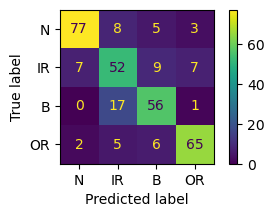

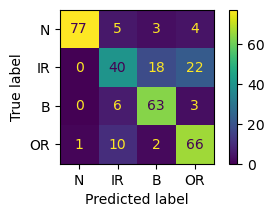

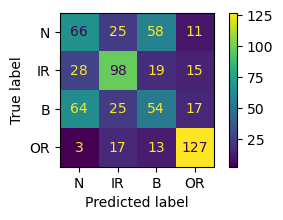

In [12]:
# Validate and Visualize
perfgoogleNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_googleNet = {}
for name in tarData:
    _, TestLoader, _, numClass = loadNoisydata(root_path, name)
    Model = torch.load('./saved_models/GoogleNet_'+ name+'_N.pth', map_location=device)
    val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch', time_batch)
    disp_conf_matrix(cm, class_names)
    logits_googleNet[f'pred_labels_{name}'] = tr_labels
    logits_googleNet[f'tr_labels_{name}'] = pred_labels
    perfgoogleNet = pd.concat((perfgoogleNet, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/cwru_N_googleNet.mat', logits_googleNet)

### SqeezeNet

Validation Accuracy =  93.75
__________________________________________________
Pricision Score = 0.9396670474278681
__________________________________________________
F_1 Score =  0.9343232423084444
__________________________________________________
Recall Score =  0.9335613980232755
__________________________________________________
Response time per batch 0.08199954032897949
Validation Accuracy =  95.0
__________________________________________________
Pricision Score = 0.9505172512919756
__________________________________________________
F_1 Score =  0.9501111050256186
__________________________________________________
Recall Score =  0.9509941694790147
__________________________________________________
Response time per batch 0.06677842140197754
Validation Accuracy =  92.5
__________________________________________________
Pricision Score = 0.9225135176021628
__________________________________________________
F_1 Score =  0.9208468008285312
________________________________________

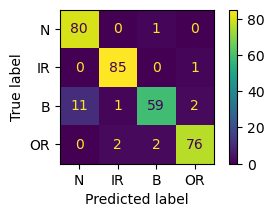

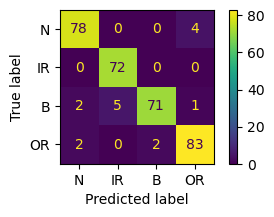

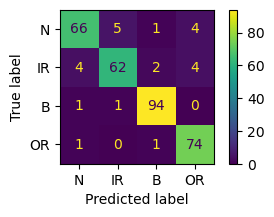

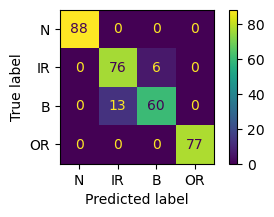

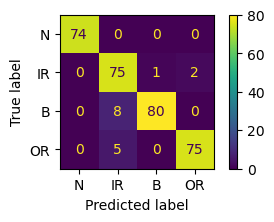

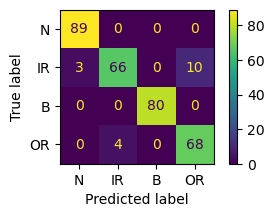

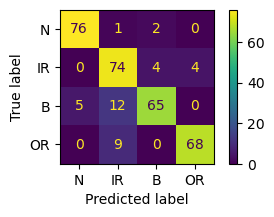

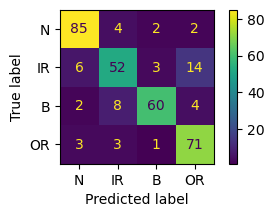

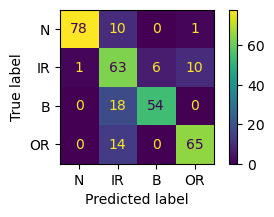

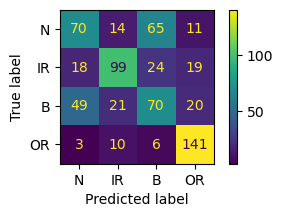

In [13]:
# Validate and Visualize
perfSqeezeNet = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_SqueezeNet = {}
for name in tarData:
    _, TestLoader, _, numClass = loadNoisydata(root_path, name)
    Model = torch.load('./saved_models/SqeezeNet_'+ name +'_N.pth', map_location=device)
    val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate(Model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch', time_batch)
    disp_conf_matrix(cm, class_names)
    logits_SqueezeNet[f'pred_labels_{name}'] = tr_labels
    logits_SqueezeNet[f'tr_labels_{name}'] = pred_labels
    perfSqeezeNet = pd.concat((perfSqeezeNet, pd.DataFrame({name : [val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/cwru_N_SqueezeNet.mat', logits_SqueezeNet)

Validation Accuracy =  0.93125
__________________________________________________
Pricision Score = 0.9294478229928188
__________________________________________________
F_1 Score =  0.9271863737443446
__________________________________________________
Recall Score =  0.9269866184677829
__________________________________________________
Response time per batch 11.090124368667603
Validation Accuracy =  0.93125
__________________________________________________
Pricision Score = 0.9309574239234055
__________________________________________________
F_1 Score =  0.9311350163744144
__________________________________________________
Recall Score =  0.9326451508731586
__________________________________________________
Response time per batch 11.927334308624268
Validation Accuracy =  0.928125
__________________________________________________
Pricision Score = 0.9258342681619205
__________________________________________________
F_1 Score =  0.9244516410695365
_________________________________

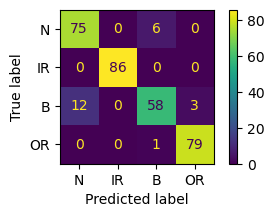

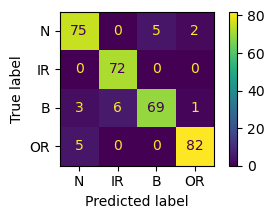

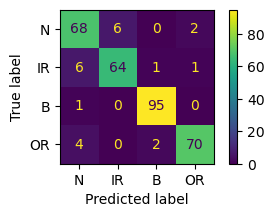

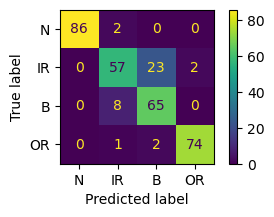

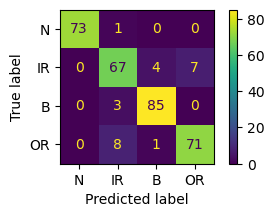

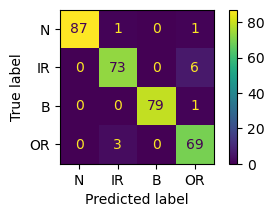

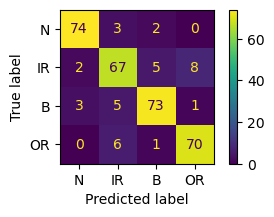

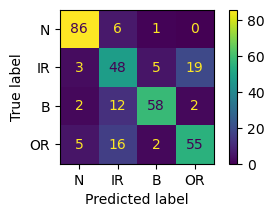

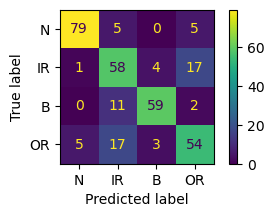

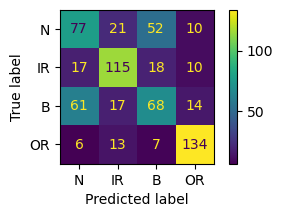

In [19]:
# Train and validate SVM
perfSVM = pd.DataFrame({'Metrics':['Val Acc.', 'Precision', 'F1_score', 'Recall']})
logits_SVM = {}
for name in tarData:
    TrainLoader, TestLoader, _, numClass = loadNoisydata(root_path, name)
    x_train, y_train = getFeatures(TrainLoader)
    model = SVC()
    model.fit(x_train, y_train)
    val_acc, cm, prec, f1, recall, time_batch, tr_labels, pred_labels = validate_svm(model, TestLoader, numClass)
    print('Validation Accuracy = ', val_acc)
    print("__________________________________________________")
    print(f'Pricision Score = {prec}')
    print('__________________________________________________')
    print(f'F_1 Score =  {f1}')
    print('__________________________________________________')
    print(f"Recall Score =  {recall}")
    print('__________________________________________________')
    print('Response time per batch', time_batch)
    disp_conf_matrix(cm, class_names)
    logits_SVM[f'pred_labels_{name}'] = tr_labels
    logits_SVM[f'tr_labels_{name}'] = pred_labels
    perfSVM = pd.concat((perfSVM, pd.DataFrame({name : [100*val_acc, prec, f1, recall]})), ignore_index = True, axis=1)
sio.savemat('./results/logits/logits_SVM_cwru.mat', logits_SVM)

In [15]:
perfSVM

,0,1,2,3,4,5,6,7,8,9,10
0,Val Acc.,0.931250,0.931250,0.928125,0.881250,0.925000,0.962500,0.887500,0.771875,0.781250,0.614062
1,Precision,0.929448,0.930957,0.925834,0.883535,0.925701,0.961039,0.887795,0.770918,0.788255,0.607786
2,F1_score,0.927186,0.931135,0.924452,0.878343,0.925123,0.961105,0.887984,0.766094,0.782345,0.610510
3,Recall,0.926987,0.932645,0.923565,0.880961,0.924717,0.961853,0.888279,0.763411,0.778907,0.614063


In [16]:
# df = pd.read_csv('./results/all_cwru_ims.csv')
# df.drop('Unnamed: 0', axis = 1, inplace=True)
# df.columns = pd.RangeIndex(start=0, stop=11, step=1)
# df

In [20]:
combPerf = pd.concat((perfSVM, perfSqeezeNet, perfgoogleNet, perfvgg16Net, perfDenseNet, perfResNeXt, perfEffNet, perfvit_pre, perfvit), ignore_index=True, axis=0)
combPerf

,0,1,2,3,4,5,6,7,8,9,10
0,Val Acc.,93.125000,93.125000,92.812500,88.125000,92.500000,96.250000,88.750000,77.187500,78.125000,61.562500
1,Precision,0.929448,0.930957,0.925834,0.883535,0.925701,0.961039,0.887795,0.770918,0.788255,0.609404
2,F1_score,0.927186,0.931135,0.924452,0.878343,0.925123,0.961105,0.887984,0.766094,0.782345,0.612062
3,Recall,0.926987,0.932645,0.923565,0.880961,0.924717,0.961853,0.888279,0.763411,0.778907,0.615625
4,Val Acc.,93.750000,95.000000,92.500000,94.062500,95.000000,94.687500,88.437500,83.750000,81.250000,59.375000
5,Precision,0.939667,0.950517,0.922514,0.940756,0.953488,0.945511,0.892261,0.837712,0.835651,0.587491
6,F1_score,0.934323,0.950111,0.920847,0.938050,0.951444,0.944000,0.885971,0.832311,0.816636,0.588043
7,Recall,0.933561,0.950994,0.920596,0.937187,0.952032,0.944972,0.885066,0.832095,0.809172,0.593750
8,Val Acc.,92.500000,87.812500,90.937500,87.812500,91.875000,90.625000,87.812500,78.125000,76.875000,53.906250
9,Precision,0.922096,0.883422,0.905746,0.875268,0.918431,0.905196,0.879903,0.780400,0.767553,0.531484


In [21]:
combPerf.to_csv('./results/all_cwru_ims_N.csv')